# Analisis Penjualan Pie dengan Multiple Linear Regression
Disini kita akan melakukan analisis penjualan pie menggunakan dataset yang sudah tersedia.

# Import library yang digunakan

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics

# Meng-upload dataset yang digunakan

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/GigasTaufan/PieSales-using-LinearRegression/master/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0



Setelah melihat data pada dataset, variabel yang mempengaruhi penjualan (pie_sales) adalah price dan advertising. Karena itu,kita drop kolom week, kemudian kita lakukan pairplot untuk melihat hubungan antar variabel.

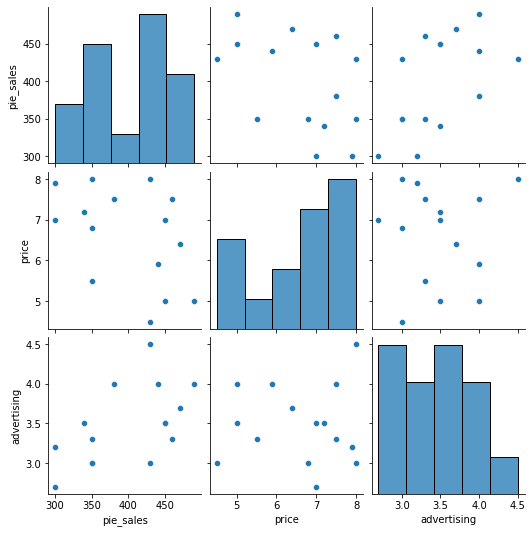

In [17]:
df.drop('week', axis=1, inplace= True)
sns.pairplot(df)

Dapat dilihat hubungan antar pie_sales dengan price dan advertising dari hasil pairplot diatas.

# Hubungan pie_sales dengan price

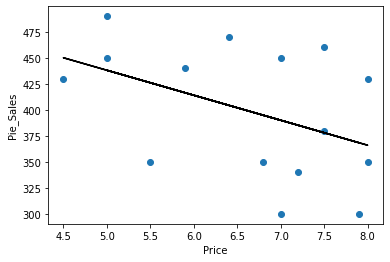

In [18]:
Xprice = df[['price']]
Y = df[['pie_sales']]
reg_price = linear_model.LinearRegression()
reg_price.fit(Xprice, Y)
plt.scatter(Xprice, Y)
plt.plot(Xprice, reg_price.predict(Xprice), color = "black")
plt.xlabel('Price')
plt.ylabel('Pie_Sales')
plt.show()

Hasilnya berupa single linear regression untuk attribut Pie_sales dan Price. Tahap selanjutnya kita cek Root Mean Squared Error dan R-squared dari model yang telah kita buat untuk mengetahui seberapa baik model tersebut.

In [19]:
X_price_pred = reg_price.predict(Xprice)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_price_pred)))
print('R^2:',metrics.r2_score(Y, X_price_pred))

RMSE:  55.01084456895846
R^2: 0.1964911145353151


Dari nilai RMSE, dapat dilihat bahwa akar dari MSE nilainya 55.
Dari R-squared, didapatkan nilainya 0.196. 

# Hubungan pie_sales dan advertising

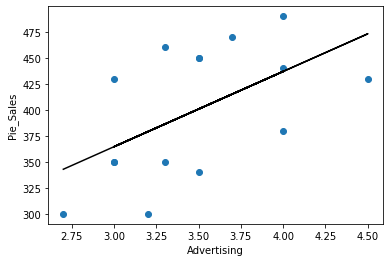

In [20]:
Xadv = df[['advertising']]
y = df[['pie_sales']]
reg_adv = linear_model.LinearRegression()
reg_adv.fit(Xadv, y)
plt.scatter(Xadv, y)
plt.plot(Xadv, reg_adv.predict(Xadv), color = "black")
plt.xlabel('Advertising')
plt.ylabel('Pie_Sales')
plt.show()

In [21]:
X_adv_pred = reg_adv.predict(Xadv)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_adv_pred)))
print('R^2:',metrics.r2_score(Y, X_adv_pred))

RMSE:  50.99615073401459
R^2: 0.3094917834795541


Nilai RMSE model kedua kita memiliki nilai yang lebih rendah dari model pertama, yaitu 50.99. Sementara, R-squarednya juga lebih tinggi, yaitu 0.309.

Artinya, model ini lebih baik dibandingkan model pertama. Oleh karena itu untuk memprediksi pie_sales , atribut advertising lebih berpengaruh.

# Multiple Linear Regression

Lakukan regresi linear dengan 2 variabel dependen (price dan advertising) dan periksa apakah hasilnya lebih baik daripada kedua model yang telah dibuat.

In [23]:
X = df[['price', 'advertising']]
X

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0
5,7.5,4.0
6,4.5,3.0
7,6.4,3.7
8,7.0,3.5
9,5.0,4.0


In [27]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)
X_pred = reg.predict(X)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y, X_pred)))
print('R^2:',metrics.r2_score(Y, X_pred))

RMSE:  42.45256683818261
R^2: 0.5214779360292288


Menggunakan 2 attribut ini untuk memprediksi pie_sales jauh lebih baik dibandingkan hanya menggunakan 1 attribut saja.


In [28]:
koef = pd.DataFrame(reg.coef_)

print('Intercept: \n', reg.intercept_)
print('Price Coefficient: \n', koef[0][0])
print('Advertising Coefficient: \n', koef[1][0])

Intercept: 
 [306.52619328]
Price Coefficient: 
 -24.975089517826934
Advertising Coefficient: 
 74.13095748874095


Model regresi linear dua variabel yang telah kita buat dapat dituliskan dengan persamaan:

${y} = a + bX_{1} + cX_{2}$


y adalah penjualan, a adalah intercept, b adalah koefisien harga, X1 adalah harga, c adalah koefisien iklan, dan X2 adalah iklan. Artinya, dengan nilai yang kita dapatkan di atas, model kita dapat ditulis dengan persamaan:

${y} = 306.526 - 24.975X_{1} + 74.131X_{2}$

Dengan persamaan tersebut, kita dapat menghitung secara manual perkiraan penjualan. Namun tentu saja, untuk mendapatkan hasil yang lebih presisi dapat menggunakan reg.predict dengan nilai harga dan iklan yang ingin diprediksi berapa kira-kira penjualannya.

# Regression menggunakan Statsmodels

In [31]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        05:13:38   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


**R-squared**

Dikarenakan jumlah Independent varibels adalah 2 maka digunakan R-squared, karena Adjusted R-squared digunakan untuk regresi dengan lebih dari dua Independent variables.

Nilai R-squared = 0.521 menunjukkan bahwa atribut price dan advertising hanya mempengaruhi price_sales sebesar 52.1% dan terdapat 47.9% dipengaruhi oleh atribut lain yang mungkin tidak dimasukkan ke dalam data.

**Autocorrelation dengan Durbin Watson**

H0: tidak terdapat autocorrelation

H1: ada autocorrelation

Nilai Durbin-Watson (D)=1.683. Berdasarkan pada tabel Durbin-Watson untuk n=15 dan k=2.

dL=0.9455

dU=1.5432.

4-dU=2.4568

4-dL=3.0545

D > dU dan D < 4-dU

Sehingga H0 diterima

Membuktikan tidak ada autocorrelation pada data.

**F-Test**

H0: tidak terdapat autocorrelation

H1: ada autocorrelation

Dengan menggunakan F-Test

Nilai F-statistic=6.539.

Tingkat signifikansi menggunakan $\alpha$= 5% atau 0.05.

Dengan n=15, k=2

Maka,

df1 = 2

df2 = 12

Berdasarkan table distribusi F maka nilai F=3.89

F-statistic > F, artinya secara signifikan atribut price dan advertising secara bersama-sama berpengaruh terhadap pie_sales.

**T-Test**

H0: Secara parsial tidak ada pengaruh yang terlalu signifikan

Ha: Secara parsial ada pengaruh yang signifikan

**Atribut Price**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=-2.306

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 12

maka berdasarkan table distribusi T maka nilai T = 2.17881.

-t < -T, H0 ditolak dan artinya secara parsial ada pengaruh signifikan antara Price dengan pie_sales.

**Atribut Advertising**

Tingkat signifikansi menggunakan $\alpha$ = 5% atau 0.05.

Dengan t=2.855

Dengan alpha = 5%/2 = 2.5% (uji 2 sisi)

df = 12

maka berdasarkan table distribusi T maka nilai T = 2.17881.

t > T, H0 ditolak, artinya secara parsial ada pengaruh signifikan antara advertising dengan pie_sales.

"Dapat disimpulkan pada t-Tes menunjukkan bahwa atribut price dan atribut advertising sama-sama memiliki pengaruh yang signifikan terhadap pie_sales"

# Kesimpulan

Dari hasil regresi linear yang dicoba, dapat disimpulkan bahwa penggunaan multiple linear regression dengan variabel price dan advertising lebih efektif digunakan dibandingkan single linear regression dengan salah satu variabel saja. Selain itu, dari hasil validasi dengan t-Test dan F-test, dapat dibuktikan bahwa kedua variabel tersebut memang layak digunakan untuk perhitungan regresi linear. 

Dilihat juga dari hasil regresi, bahwa atribut price dan advertising hanya dapat mempengaruhi 52.1% nilai prediksi, 47.9% dipengaruhi atribut lain yang mungkin tidak dimasukkan dalam dataset.

Sementara denganan Durbin_Watson, dapat dibuktikan bahwa tidak terjadi autokorelasi sehingga regresi linear dapat digunakan.